In [9]:
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
experiments = pickle.load(open("final_results/experiments_all_with.p", "rb"))
outcomes = pickle.load(open("final_results/outcomes_all_with.p", "rb"))
df_all = pd.merge(experiments,pd.DataFrame(outcomes), left_index=True, right_index=True)

In [11]:
df_all
df_all['c'] = df_all.scenario_var.apply((lambda x: 10000 if x == 2 else x))

,r,scenario_var,p,scenario,policy,model,total_flow,fraction_captured_total,serviceable_fraction,served_fraction,optimal_facilities,non_zero_flows,add_nodes_used,no_sited_nodes,no_sited_nodes_check
0,70000,0,1,100,0,frlm,2.941841e+06,0.016316,0.103069,0.158305,"{'22637863': 0.0, '22638019': 0.0, '22638146':...","{('NLDOR', 'NLRTM', 0): {'combinations': [['88...",0.0,1.0,1.0
1,70000,1,1,101,0,frlm,2.941841e+06,0.017516,0.103069,0.169945,"{'22637863': 0.0, '22638019': 0.0, '22638146':...","{('NLDOR', 'NLRTM', 0): {'combinations': [['88...",0.0,1.0,1.0
2,70000,2,1,102,0,frlm,2.941841e+06,0.017516,0.103069,0.169945,"{'22637863': 0.0, '22638019': 0.0, '22638146':...","{('NLDOR', 'NLRTM', 0): {'combinations': [['88...",0.0,1.0,1.0
3,110000,0,1,103,0,frlm,2.941841e+06,0.016316,0.409292,0.039865,"{'22637863': 0.0, '22638019': 0.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0,1.0,1.0
4,110000,1,1,104,0,frlm,2.941841e+06,0.027191,0.409292,0.066435,"{'22637863': 0.0, '22638019': 0.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,110000,1,100,104,99,frlm,2.941841e+06,0.409292,0.409292,1.000000,"{'22637863': 1.0, '22638019': 3.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0,100.0,100.0
896,110000,2,100,105,99,frlm,2.941841e+06,0.409292,0.409292,1.000000,"{'22637863': 1.0, '22638019': 1.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0,66.0,66.0
897,150000,0,100,106,99,frlm,2.941841e+06,0.716140,0.746216,0.959696,"{'22637863': 0.0, '22638019': 0.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0,69.0,69.0
898,150000,1,100,107,99,frlm,2.941841e+06,0.716116,0.746216,0.959664,"{'22637863': 1.0, '22638019': 0.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0,65.0,65.0


In [5]:
df_all['no_sited'] = df_all.apply(lambda x: sum(x.optimal_facilities.values()), axis=1)

In [6]:
df_all ['% assigned flow of max'] = (df_all['total_flow']*df_all['fraction_captured_total'])/(df_all['no_sited_nodes'])

In [30]:
#placed stations must be stored!!

In [31]:
df_all.loc[df_all.scenario_var]

,r,scenario_var,p,scenario,policy,model,total_flow,fraction_captured_total,serviceable_fraction,served_fraction,non_zero_flows,optimal_facilities,add_nodes_used,no_sited_nodes,c,% assigned flow of max
0,70000,0,1,100,0,frlm,2.941841e+06,0.016316,0.103069,0.158305,"{'22637863': 0.0, '22638019': 0.0, '22638146':...","{('NLDOR', 'NLRTM', 0): {'combinations': [['88...",0.0,1.0,2000,48000.000020
1,70000,1,1,101,0,frlm,2.941841e+06,0.017516,0.103069,0.169945,"{'22637863': 0.0, '22638019': 0.0, '22638146':...","{('NLDOR', 'NLRTM', 0): {'combinations': [['88...",0.0,1.0,1,51529.491156
2,70000,2,1,102,0,frlm,2.941841e+06,0.017516,0.103069,0.169945,"{'22637863': 0.0, '22638019': 0.0, '22638146':...","{('NLDOR', 'NLRTM', 0): {'combinations': [['88...",0.0,1.0,2,51529.491156
3,110000,0,1,103,0,frlm,2.941841e+06,0.016316,0.409292,0.039865,"{'22637863': 0.0, '22638019': 0.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0,1.0,2000,47999.999998
4,110000,1,1,104,0,frlm,2.941841e+06,0.027191,0.409292,0.066435,"{'22637863': 0.0, '22638019': 0.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0,1.0,1,79991.999998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,110000,1,100,104,99,frlm,2.941841e+06,0.409292,0.409292,1.000000,"{'22637863': 1.0, '22638019': 1.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0,99.0,1,12162.346704
896,110000,2,100,105,99,frlm,2.941841e+06,0.409292,0.409292,1.000000,"{'22637863': 1.0, '22638019': 1.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0,66.0,2,18243.520058
897,150000,0,100,106,99,frlm,2.941841e+06,0.716140,0.746216,0.959696,"{'22637863': 1.0, '22638019': 0.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0,100.0,2000,21067.713167
898,150000,1,100,107,99,frlm,2.941841e+06,0.716116,0.746216,0.959664,"{'22637863': 1.0, '22638019': 1.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0,57.0,1,36959.637140


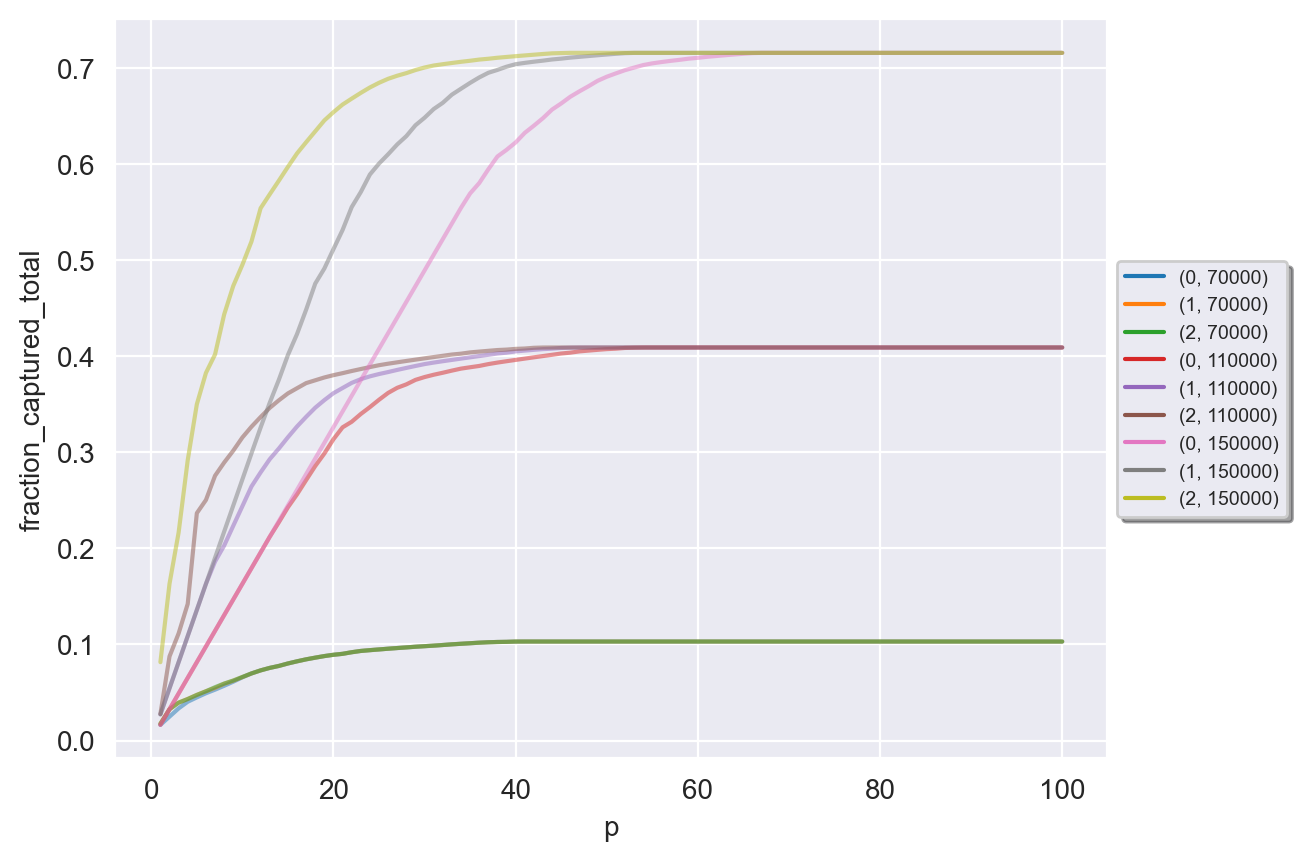

In [7]:
fig, ax = plt.subplots(dpi=200)
sns.lineplot(x='p', y='fraction_captured_total', hue=df_all[['scenario_var', 'r']].apply(tuple, axis=1), data=df_all, alpha=0.5)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=7, fancybox=True, shadow=True)

<AxesSubplot:xlabel='p', ylabel='no_sited_nodes'>

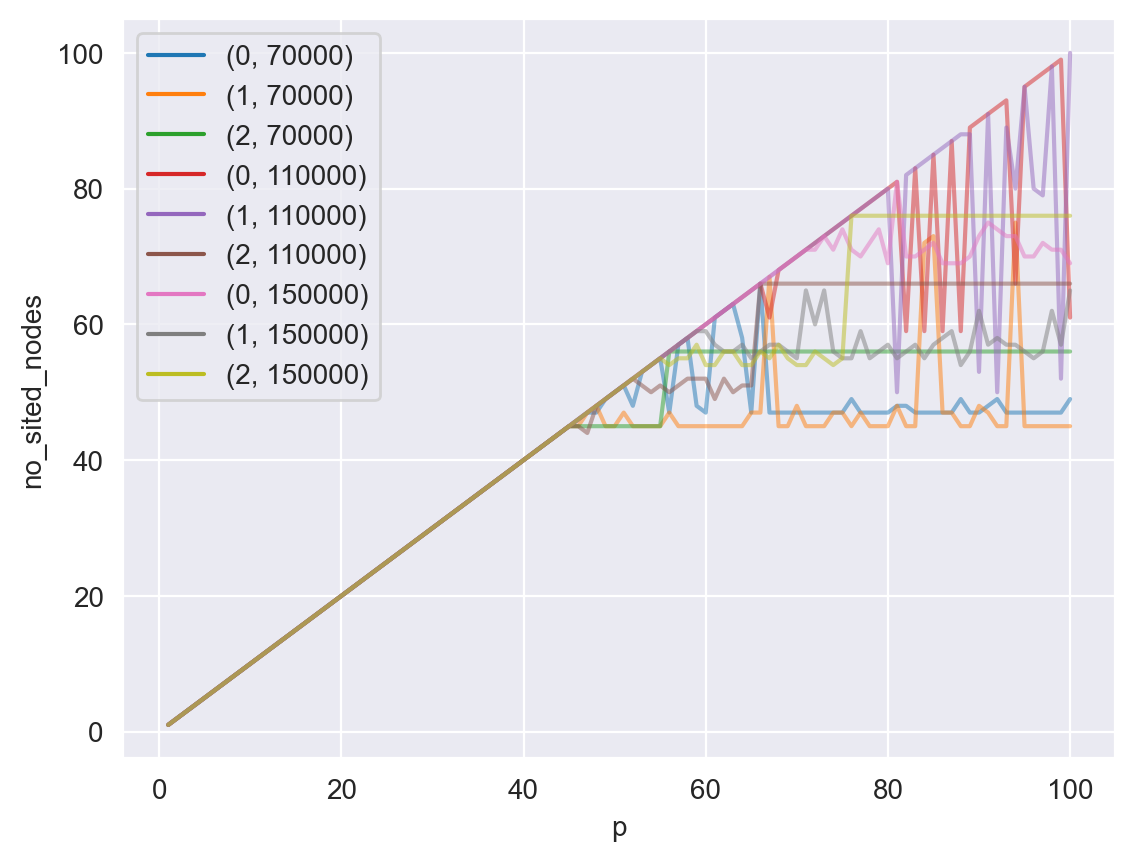

In [8]:
fig, ax = plt.subplots(dpi=200)
sns.lineplot(x='p', y='no_sited_nodes', hue=df_all[['scenario_var', 'r']].apply(tuple, axis=1), data=df_all, alpha=0.5)

In [7]:
## with additional nodes
experiments = pickle.load(open("final_results/experiments_all_with.p", "rb"))
outcomes = pickle.load(open("final_results/outcomes_all_with.p", "rb"))
df_all_with = pd.merge(experiments,pd.DataFrame(outcomes), left_index=True, right_index=True)

In [8]:
df_all_with

,r,scenario_var,p,scenario,policy,model,total_flow,fraction_captured_total,serviceable_fraction,served_fraction,optimal_facilities,non_zero_flows,add_nodes_used,no_sited_nodes,no_sited_nodes_check
0,70000,0,1,100,0,frlm,2.941841e+06,0.016316,0.103069,0.158305,"{'22637863': 0.0, '22638019': 0.0, '22638146':...","{('NLDOR', 'NLRTM', 0): {'combinations': [['88...",0.0,1.0,1.0
1,70000,1,1,101,0,frlm,2.941841e+06,0.017516,0.103069,0.169945,"{'22637863': 0.0, '22638019': 0.0, '22638146':...","{('NLDOR', 'NLRTM', 0): {'combinations': [['88...",0.0,1.0,1.0
2,70000,2,1,102,0,frlm,2.941841e+06,0.017516,0.103069,0.169945,"{'22637863': 0.0, '22638019': 0.0, '22638146':...","{('NLDOR', 'NLRTM', 0): {'combinations': [['88...",0.0,1.0,1.0
3,110000,0,1,103,0,frlm,2.941841e+06,0.016316,0.409292,0.039865,"{'22637863': 0.0, '22638019': 0.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0,1.0,1.0
4,110000,1,1,104,0,frlm,2.941841e+06,0.027191,0.409292,0.066435,"{'22637863': 0.0, '22638019': 0.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,110000,1,100,104,99,frlm,2.941841e+06,0.409292,0.409292,1.000000,"{'22637863': 1.0, '22638019': 3.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0,100.0,100.0
896,110000,2,100,105,99,frlm,2.941841e+06,0.409292,0.409292,1.000000,"{'22637863': 1.0, '22638019': 1.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0,66.0,66.0
897,150000,0,100,106,99,frlm,2.941841e+06,0.716140,0.746216,0.959696,"{'22637863': 0.0, '22638019': 0.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0,69.0,69.0
898,150000,1,100,107,99,frlm,2.941841e+06,0.716116,0.746216,0.959664,"{'22637863': 1.0, '22638019': 0.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0,65.0,65.0
